🧩 Minimundo 13 — Análise de Eficiência de Painéis Solares (Energia)

Contexto: Uma usina solar deseja analisar o desempenho de seus painéis com base natemperatura e radiação solar.

Tarefas:
- Calcular o rendimento médio (%) por hora.
- Criar gráfico de dispersão (temperatura × potência gerada).
- Gerar mapa de calor (hora × eficiência).

Bibliotecas sugeridas: Pandas, Seaborn, Matplotlib

Arquivo: painel_solar.csv

Rendimento médio por hora:
hora
8     47.06
10    45.88
12    44.57
14    42.55
16    41.38
Name: rendimento_percent, dtype: float64


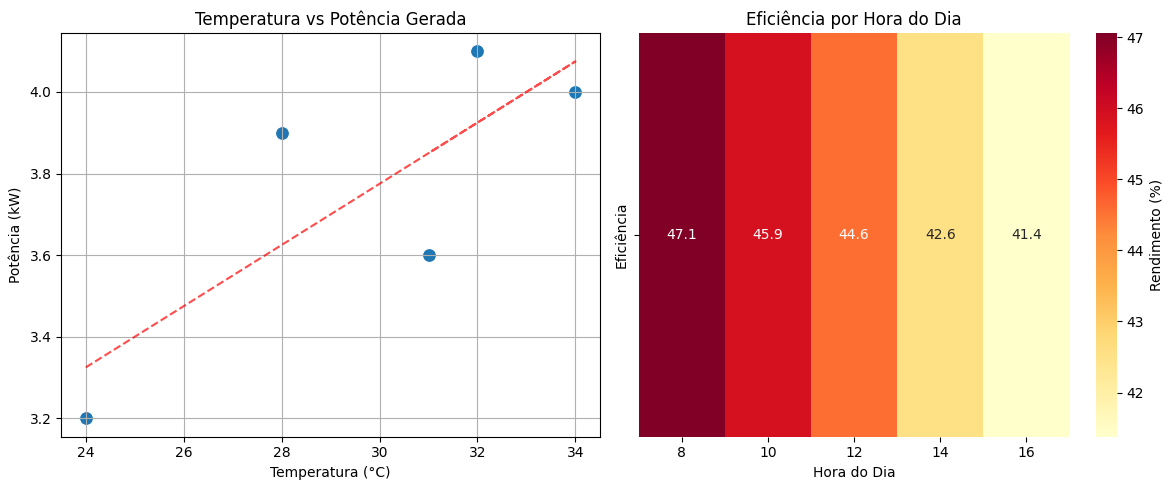

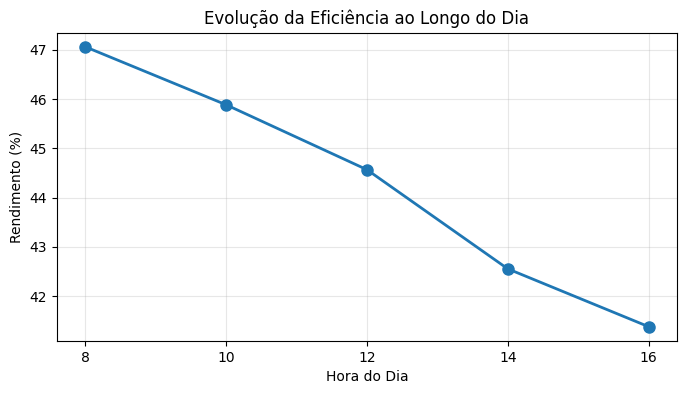


--- Estatísticas Resumidas ---
Rendimento médio total: 44.29%
Rendimento máximo: 47.06% (às 8h)
Rendimento mínimo: 41.38% (às 16h)
Potência máxima: 4.1kW (às 12h)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar os dados
df = pd.read_csv('dados/painel_solar.csv')

# 1. Calcular rendimento médio por hora (considerando área padrão de 10 m²)
area_painel = 10  # m² (valor assumido para cálculo do rendimento)
df['potencia_incidente_kw'] = (df['radiacao_wm2'] * area_painel) / 1000
df['rendimento_percent'] = (df['potencia_kw'] / df['potencia_incidente_kw']) * 100
rendimento_medio = df.groupby('hora')['rendimento_percent'].mean()

print("Rendimento médio por hora:")
print(rendimento_medio.round(2))

# 2. Gráfico de dispersão (temperatura × potência)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='temperatura_c', y='potencia_kw', s=100)
plt.title('Temperatura vs Potência Gerada')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Potência (kW)')
plt.grid(True)

# Adicionar linha de tendência
z = np.polyfit(df['temperatura_c'], df['potencia_kw'], 1)
p = np.poly1d(z)
plt.plot(df['temperatura_c'], p(df['temperatura_c']), "r--", alpha=0.7)

# 3. Mapa de calor corrigido (hora × eficiência)
plt.subplot(1, 2, 2)

# Criar matriz para o heatmap
horas = df['hora'].values
eficiencias = df['rendimento_percent'].values

# Criar uma matriz 2D para o heatmap (uma linha com todas as eficiências)
heatmap_data = eficiencias.reshape(1, -1)

# Criar o heatmap
sns.heatmap(heatmap_data, 
            annot=True, 
            fmt=".1f", 
            cmap="YlOrRd", 
            cbar_kws={'label': 'Rendimento (%)'},
            xticklabels=horas,
            yticklabels=['Eficiência'])
plt.title('Eficiência por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('')

plt.tight_layout()
plt.show()

# 4. Gráfico adicional: Evolução da eficiência ao longo do dia
plt.figure(figsize=(8, 4))
plt.plot(df['hora'], df['rendimento_percent'], 'o-', linewidth=2, markersize=8)
plt.title('Evolução da Eficiência ao Longo do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Rendimento (%)')
plt.grid(True, alpha=0.3)
plt.xticks(df['hora'])
plt.show()

# Estatísticas resumidas
print("\n--- Estatísticas Resumidas ---")
print(f"Rendimento médio total: {df['rendimento_percent'].mean():.2f}%")
print(f"Rendimento máximo: {df['rendimento_percent'].max():.2f}% (às {df.loc[df['rendimento_percent'].idxmax(), 'hora']}h)")
print(f"Rendimento mínimo: {df['rendimento_percent'].min():.2f}% (às {df.loc[df['rendimento_percent'].idxmin(), 'hora']}h)")
print(f"Potência máxima: {df['potencia_kw'].max():.1f}kW (às {df.loc[df['potencia_kw'].idxmax(), 'hora']}h)")